In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [15]:
df = pd.read_csv('sustainability_data.csv')

In [17]:
print(df.head())

   Year  Energy_Consumption  Renewable_Percentage   GDP  CO2_Emissions
0  2000                 517             13.823292   985     816.163479
1  2001                 516             24.170636  1334     869.155993
2  2002                 468             28.369161  1604     883.858124
3  2003                 531             19.401217  1668     947.372230
4  2004                 483             26.920520  1254     837.837492


In [19]:
print(df.isnull().sum())
df = df.dropna()

Year                    0
Energy_Consumption      0
Renewable_Percentage    0
GDP                     0
CO2_Emissions           0
dtype: int64


In [23]:
X = df[['Energy_Consumption', 'Renewable_Percentage', 'GDP']]
y = df['CO2_Emissions']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


In [38]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_poly_test)
y_pred

array([ 734.07298491,  874.62164867,  947.22015401,  858.08950479,
       1027.78382866])

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2341.1134159354406
R^2 Score: 0.06978468406873661


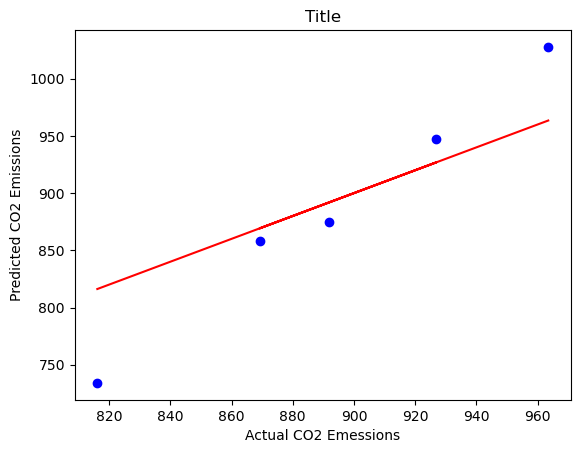

In [52]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual CO2 Emessions')
plt.ylabel('Predicted CO2 Emissions')

plt.title('Title')
plt.show()